In [ ]:
#""This project attempts to gather data from OpenStreetMap and help visualize different amenities amenities across U.S. 
# states (like restaurants, parks, schools, hospitals, etc.). The idea is if a user enters  the name of a state and the 
# types of amenities they are interested in, the code will fetch the relevant data and plot it on a map. It pulls data 
# from OpenStreetMap using a query system based on the state’s geographical boundaries. The result is a colorful map 
# showing each amenity type in a different color.""

Enter the state (e.g., 'California'): California
Enter amenities (comma-separated, e.g., 'restaurant, park'): restaurant


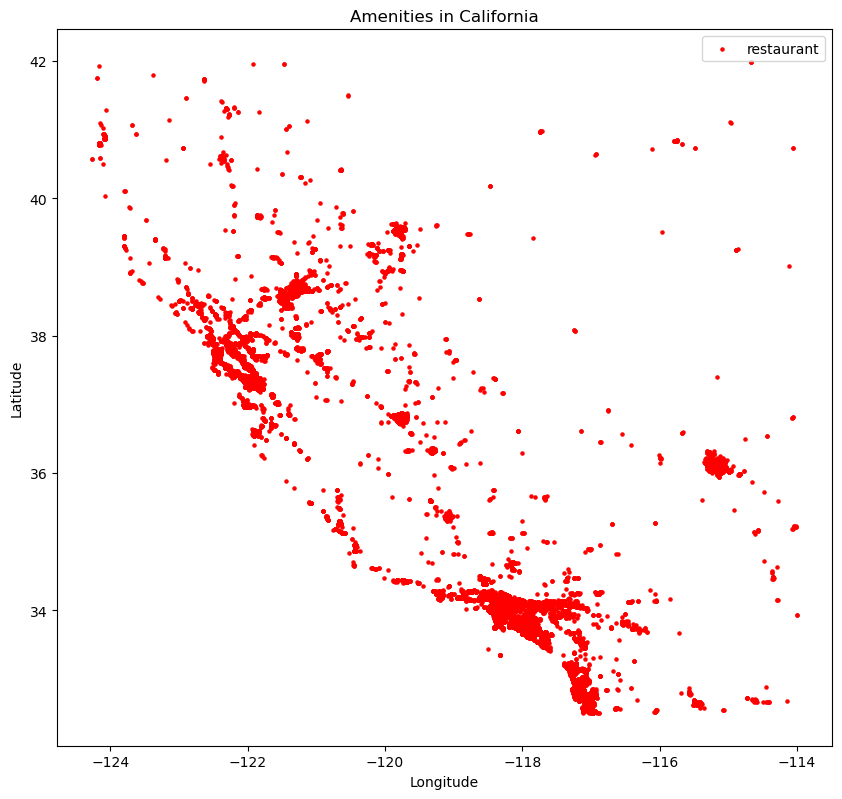

In [15]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Define the bounding box for each state. The box specifies the latitudes and longitudes of each state's borders.
state_bboxes = {
    'Tennessee': (-90.3,34.9,-81.6,36.6),  
    'California': (32.5, -124.5, 42.0, -114.0),
    'Texas': (26.0, -106.5, 36.5, -93.5),
    'New York': (40.5, -79.5, 45.0, -71.0),
    'Florida': (24.5, -87.5, 31.0, -80.0),
    'Nevada': (35.0, -120.0, 42.0, -114.0),
    'Illinois': (36.5, -91.5, 42.5, -87.5),
    'Arizona': (31.0, -115.0, 37.0, -109.0),
}

# Function to get data from Overpass API based on state boundaries and requested amenity
def get_amenities(amenity, bbox):
    # URL for the Overpass API
    overpass_url = "http://overpass-api.de/api/interpreter"
    
    # Overpass query to fetch data for the given amenity within the state's bounding box
    query = f'[out:json]; node["amenity"="{amenity}"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}); out body;'
    
    # Send the request to the API
    response = requests.get(overpass_url, params={'data': query})
    
    # If the request is successful (status code 200), return the data
    if response.status_code == 200:
        return response.json()
    else:
        # If there’s an issue with the request, print an error message and return None
        print(f"Error fetching data for {amenity}. Status code: {response.status_code}")
        return None

# Function to create a plot showing amenities on a map
def plot_amenities(state_name, amenities):
    # Check if the state is in our predefined list of states
    bbox = state_bboxes.get(state_name)
    
    # If the state is not found, print an error and stop
    if not bbox:
        print(f"State '{state_name}' not found!")
        return
    
    # Prepare the plot with a specified size
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Define colors for each type of amenity
    colors = {'restaurant': 'red', 'park': 'green', 'school': 'blue', 'hospital': 'purple'}
    
    # Loop through each requested amenity
    for amenity in amenities:
        # Fetch data for the current amenity within the state's bounding box
        data = get_amenities(amenity, bbox)
        
        # If the data was successfully fetched
        if data and 'elements' in data:
            # Extract the latitude and longitude for each location
            geometry = [Point(node['lon'], node['lat']) for node in data['elements']]
            
            # Create a GeoDataFrame to store the data
            gdf = gpd.GeoDataFrame({'amenity': [amenity]*len(geometry)}, geometry=geometry)
            
            # Plot the amenity on the map with its specific color
            gdf.plot(ax=ax, marker='o', color=colors.get(amenity, 'black'), label=amenity, markersize=5)
    
    # Add title and labels to the plot
    ax.set_title(f"Amenities in {state_name}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
    # Show the legend to label the different amenities
    ax.legend()
    
    # Display the plot
    plt.show()

# Function to ask the user for input: state and amenities they want to visualize
def ask_for_user_input():
    # Ask the user for the state they want to explore
    state_name = input("Enter the state (e.g., 'California'): ").capitalize()
    
    # Ask the user for the list of amenities they want to see (comma-separated)
    amenities_input = input("Enter amenities (comma-separated, e.g., 'restaurant, park'): ")
    amenities = [amenity.strip() for amenity in amenities_input.split(",")]
    
    # Call the function to plot the amenities for the chosen state
    plot_amenities(state_name, amenities)

# Start the program by asking for user input
if __name__ == "__main__":
    ask_for_user_input()

Enter the state (e.g., 'California'): Tennessee
Enter amenities (comma-separated, e.g., 'restaurant, park'): park


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


Error fetching data for park. Status code: 400


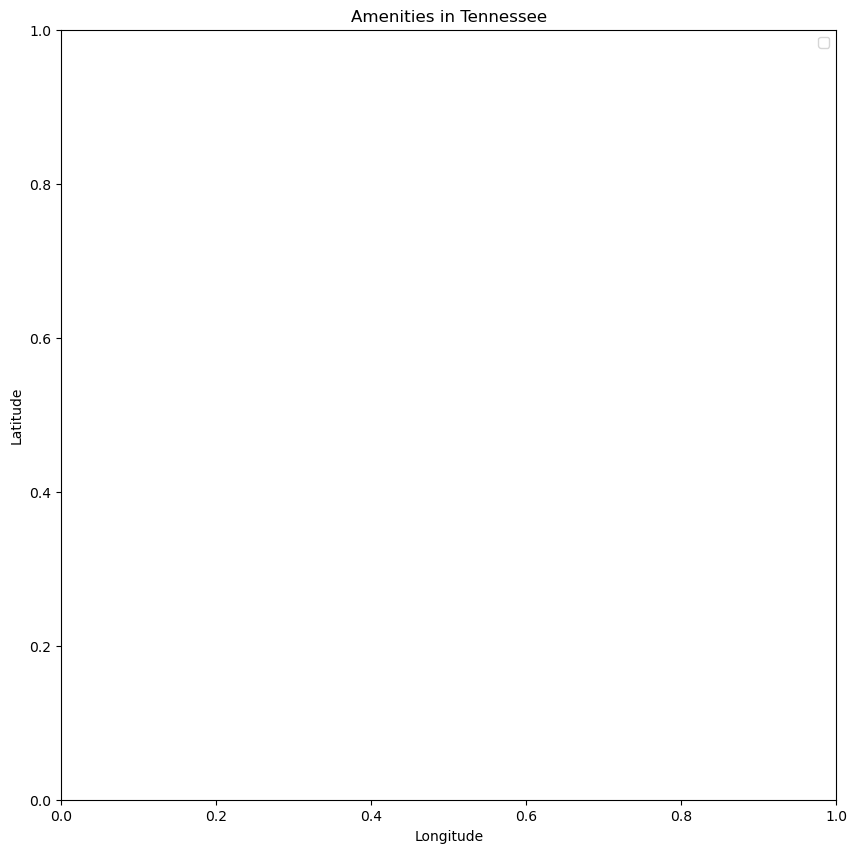

In [17]:
import requests
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Define the bounding box for each state. The box specifies the latitudes and longitudes of each state's borders.
state_bboxes = {
    'Tennessee': (-90.3,34.9,-81.6,36.6),  
    'California': (32.5, -124.5, 42.0, -114.0),
    'Texas': (26.0, -106.5, 36.5, -93.5),
    'New York': (40.5, -79.5, 45.0, -71.0),
    'Florida': (24.5, -87.5, 31.0, -80.0),
    'Nevada': (35.0, -120.0, 42.0, -114.0),
    'Illinois': (36.5, -91.5, 42.5, -87.5),
    'Arizona': (31.0, -115.0, 37.0, -109.0),
}

# Function to get data from Overpass API based on state boundaries and requested amenity
def get_amenities(amenity, bbox):
    # URL for the Overpass API
    overpass_url = "http://overpass-api.de/api/interpreter"
    
    # Overpass query to fetch data for the given amenity within the state's bounding box
    query = f'[out:json]; node["amenity"="{amenity}"]({bbox[0]},{bbox[1]},{bbox[2]},{bbox[3]}); out body;'
    
    # Send the request to the API
    response = requests.get(overpass_url, params={'data': query})
    
    # If the request is successful (status code 200), return the data
    if response.status_code == 200:
        return response.json()
    else:
        # If there’s an issue with the request, print an error message and return None
        print(f"Error fetching data for {amenity}. Status code: {response.status_code}")
        return None

# Function to create a plot showing amenities on a map
def plot_amenities(state_name, amenities):
    # Check if the state is in our predefined list of states
    bbox = state_bboxes.get(state_name)
    
    # If the state is not found, print an error and stop
    if not bbox:
        print(f"State '{state_name}' not found!")
        return
    
    # Prepare the plot with a specified size
    fig, ax = plt.subplots(figsize=(10, 10))
    
    # Define colors for each type of amenity
    colors = {'restaurant': 'red', 'park': 'green', 'school': 'blue', 'hospital': 'purple'}
    
    # Loop through each requested amenity
    for amenity in amenities:
        # Fetch data for the current amenity within the state's bounding box
        data = get_amenities(amenity, bbox)
        
        # If the data was successfully fetched
        if data and 'elements' in data:
            # Extract the latitude and longitude for each location
            geometry = [Point(node['lon'], node['lat']) for node in data['elements']]
            
            # Create a GeoDataFrame to store the data
            gdf = gpd.GeoDataFrame({'amenity': [amenity]*len(geometry)}, geometry=geometry)
            
            # Plot the amenity on the map with its specific color
            gdf.plot(ax=ax, marker='o', color=colors.get(amenity, 'black'), label=amenity, markersize=5)
    
    # Add title and labels to the plot
    ax.set_title(f"Amenities in {state_name}")
    ax.set_xlabel("Longitude")
    ax.set_ylabel("Latitude")
    
    # Show the legend to label the different amenities
    ax.legend()
    
    # Display the plot
    plt.show()

# Function to ask the user for input: state and amenities they want to visualize
def ask_for_user_input():
    # Ask the user for the state they want to explore
    state_name = input("Enter the state (e.g., 'California'): ").capitalize()
    
    # Ask the user for the list of amenities they want to see (comma-separated)
    amenities_input = input("Enter amenities (comma-separated, e.g., 'restaurant, park'): ")
    amenities = [amenity.strip() for amenity in amenities_input.split(",")]
    
    # Call the function to plot the amenities for the chosen state
    plot_amenities(state_name, amenities)

# Start the program by asking for user input
if __name__ == "__main__":
    ask_for_user_input()